In [11]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 

In [4]:
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",na_values=['NA', '?'])

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
names = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'year', 'origin']
x = df[names].values
y = df['mpg'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

In [5]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline    
from IPython.display import display, HTML    

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

Final score (RMSE): 3.0019345985860766


,coef,positive
cylinders,-0.427721,False
weight,-0.007255,False
horsepower,-0.005491,False
displacement,0.020166,True
acceleration,0.138575,True
year,0.783047,True
origin,1.003762,True


Intercept: -19.101231042200112


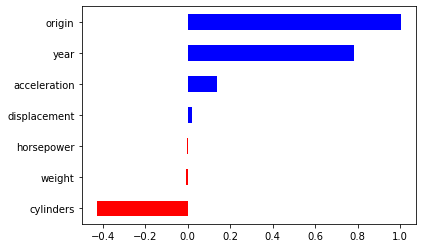

In [14]:
from sklearn.linear_model import LinearRegression

# Create linear regression
regressor = LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

<hr> <h3> L1 - LASSO </h3>

Final score (RMSE): 3.060402190403332


,coef,positive
cylinders,-0.012995,False
weight,-0.007328,False
horsepower,-0.002715,False
displacement,0.011601,True
acceleration,0.114391,True
origin,0.708222,True
year,0.777480,True


Intercept: -18.506677982383223


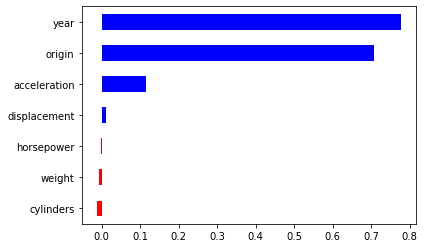

In [23]:
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

In [24]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.xlabel('dataset')
    plt.legend()
    plt.show()

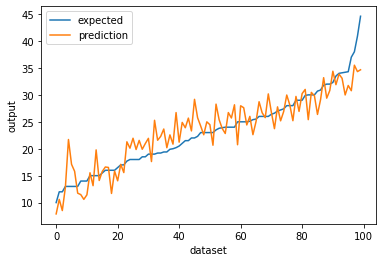

In [25]:
# Plot the chart
chart_regression(pred,y_test)

(1e-08, 100000000.0)

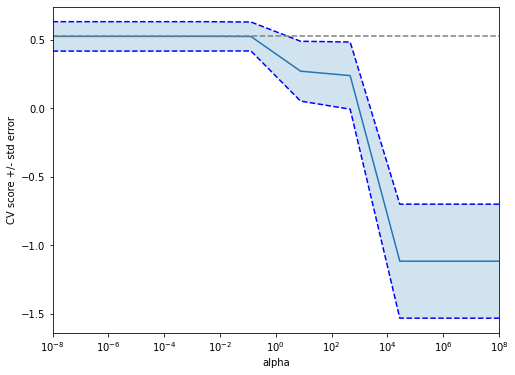

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lasso = Lasso(random_state=42)
alphas = np.logspace(-8, 8, 10)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, x, y, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

<hr><h3> L2 - RIDGE </h3>

Final score (RMSE): 3.0036496535815043


,coef,positive
cylinders,-0.421393,False
weight,-0.007257,False
horsepower,-0.005385,False
displacement,0.020006,True
acceleration,0.138470,True
year,0.782889,True
origin,0.994621,True


Intercept: -19.079800744254904


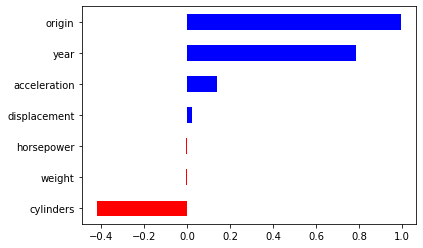

In [31]:
import sklearn
from sklearn.linear_model import Ridge

# Create linear regression
regressor = Ridge(alpha=1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

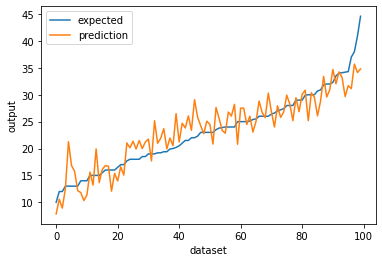

In [29]:
# Plot the chart
chart_regression(pred,y_test)

<hr><h3> ElasticNet </h3>

Final score (RMSE): 3.0450899960775026


,coef,positive
cylinders,-0.274010,False
weight,-0.007303,False
horsepower,-0.003231,False
displacement,0.016194,True
acceleration,0.132348,True
year,0.777482,True
origin,0.782781,True


Intercept: -18.389355690429767


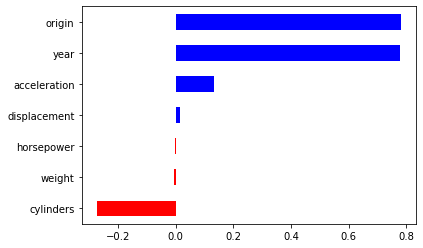

In [32]:
import sklearn
from sklearn.linear_model import ElasticNet

# Create linear regression
regressor = ElasticNet(alpha=0.1, l1_ratio=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

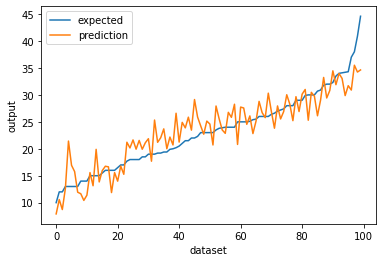

In [33]:
# Plot the chart
chart_regression(pred,y_test)